# Identifying Fraudulent Activities

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fraud_data = pd.read_csv('Fraud_Data.csv')
country_ip = pd.read_csv('IpAddress_to_Country.csv')

In [3]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [4]:
country_ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
user_id           151112 non-null int64
signup_time       151112 non-null object
purchase_time     151112 non-null object
purchase_value    151112 non-null int64
device_id         151112 non-null object
source            151112 non-null object
browser           151112 non-null object
sex               151112 non-null object
age               151112 non-null int64
ip_address        151112 non-null float64
class             151112 non-null int64
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [6]:
country_ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
lower_bound_ip_address    138846 non-null float64
upper_bound_ip_address    138846 non-null int64
country                   138846 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [106]:
#fraud_data['country'] = np.nan
country = []
for i, row in fraud_data.iterrows():
    country_row = country_ip[(country_ip['lower_bound_ip_address']<=row['ip_address']) & (country_ip['upper_bound_ip_address']>=row['ip_address'])]
    if not country_row.empty: 
        #fraud_data['country'][i] = country_row['country'].values[0]
        country.append(country_row['country'].values[0])
    else:
        country.append('np.nan')
    

In [108]:
fraud_data['country'] = country

In [109]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,np.nan
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [114]:
fraud_data.to_csv('Fraud_Data_country.csv', index=False)

In [115]:
fraud_data = pd.read_csv('Fraud_Data_country.csv')

In [116]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,np.nan
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [123]:
fraud_data['time_first_purchase'] = (pd.to_datetime(fraud_data['purchase_time']) - pd.to_datetime(fraud_data['signup_time'])).dt.seconds

In [152]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_first_purchase
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,60085
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461


In [151]:
fraud_data['country'] = fraud_data['country'].replace('np.nan', 'Other')

In [153]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 13 columns):
user_id                151112 non-null int64
signup_time            151112 non-null object
purchase_time          151112 non-null object
purchase_value         151112 non-null int64
device_id              151112 non-null object
source                 151112 non-null object
browser                151112 non-null object
sex                    151112 non-null object
age                    151112 non-null int64
ip_address             151112 non-null float64
class                  151112 non-null int64
country                151112 non-null object
time_first_purchase    151112 non-null int64
dtypes: float64(1), int64(5), object(7)
memory usage: 15.0+ MB


In [130]:
# Bar plot for discrete variable

def barplot(df, var_col, tar_col, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    sns.countplot(x=var_col, hue=tar_col, data=df, order=df[var_col].value_counts().sort_index().index)
    plt.yscale(yscale)
    plt.ylabel('count',  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
    plt.legend(fontsize=15)
    return 

# histogram for continuous variable
#kws={"histtype": "bar", "alpha": 0.3}
kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

def histplot(df, var_col, tar_col, binsize=20, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    tar_vals = df[tar_col].value_counts().index
    for tar_val in tar_vals:
        sns.distplot(df.loc[df[tar_col]==tar_val, var_col], bins=binsize, hist_kws=kws, kde=True, norm_hist=True, label=str(tar_val))
    plt.yscale(yscale)
    plt.ylabel('frequency',  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
#        plt.xlim(xlim1, xlim2)
    plt.legend(fontsize=15)
    return 


# Single histogram for one category of target variable
def histplot_single(df, var_col, tar_col, tar_val, binsize=20, yscale='linear'):
    fig = plt.figure(figsize=(16,8))
    sns.distplot(df.loc[df[tar_col]==tar_val, var_col], bins=binsize, hist_kws=kws, kde=False, norm_hist=True, label=str(tar_val))
    plt.yscale(yscale)
    plt.ylabel('frequency',  fontsize=15)
    plt.xlabel(var_col, fontsize=15)
#        plt.xlim(xlim1, xlim2)
    plt.legend(fontsize=15)
    return 

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


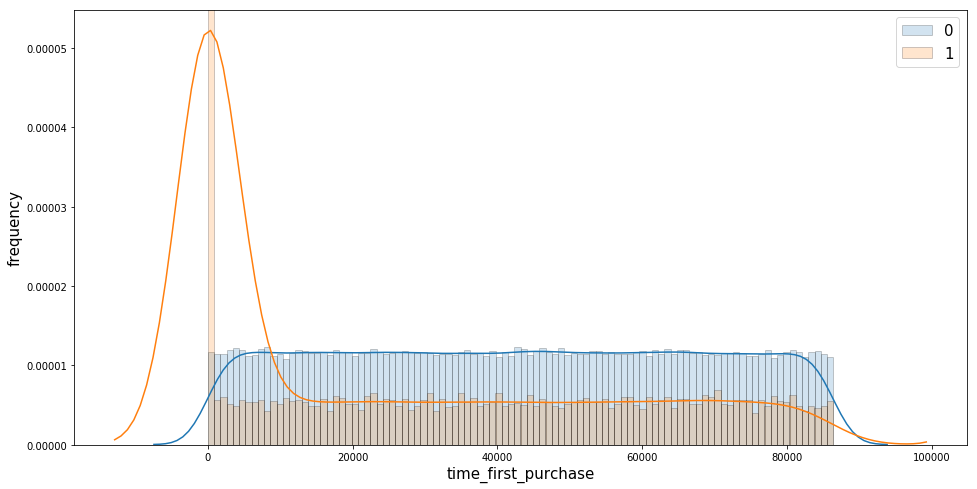

In [131]:
histplot(fraud_data, 'time_first_purchase', 'class', binsize=100, yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


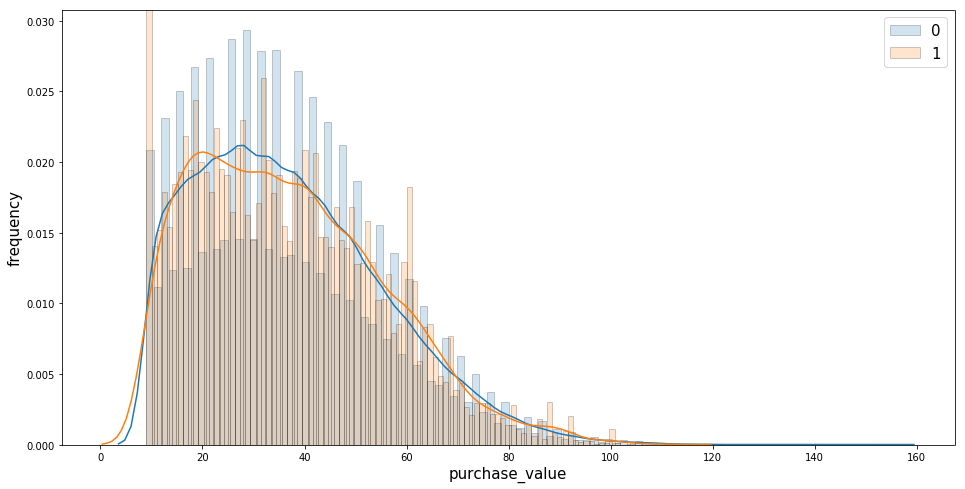

In [132]:
histplot(fraud_data, 'purchase_value', 'class', binsize=100, yscale='linear')

In [137]:
fraud_data['class'].value_counts()

0    136961
1     14151
Name: class, dtype: int64

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


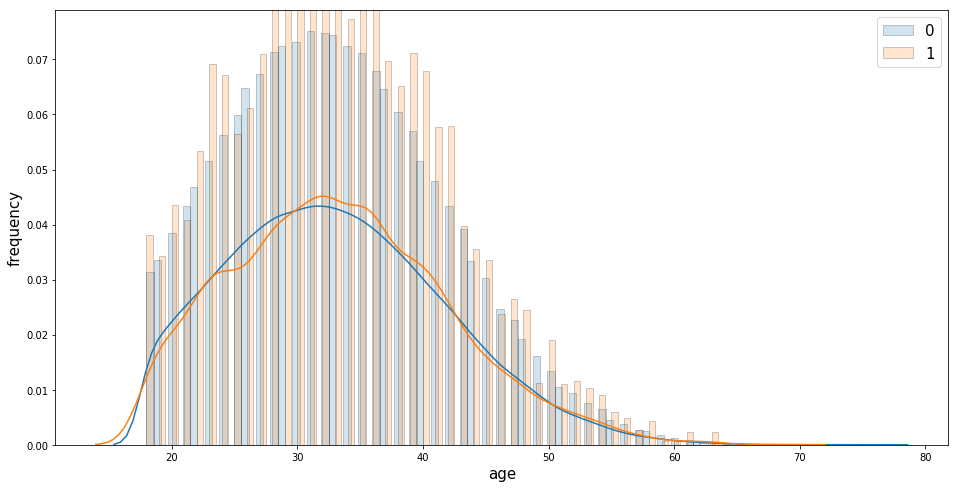

In [141]:
histplot(fraud_data, 'age', 'class', binsize=100, yscale='linear')

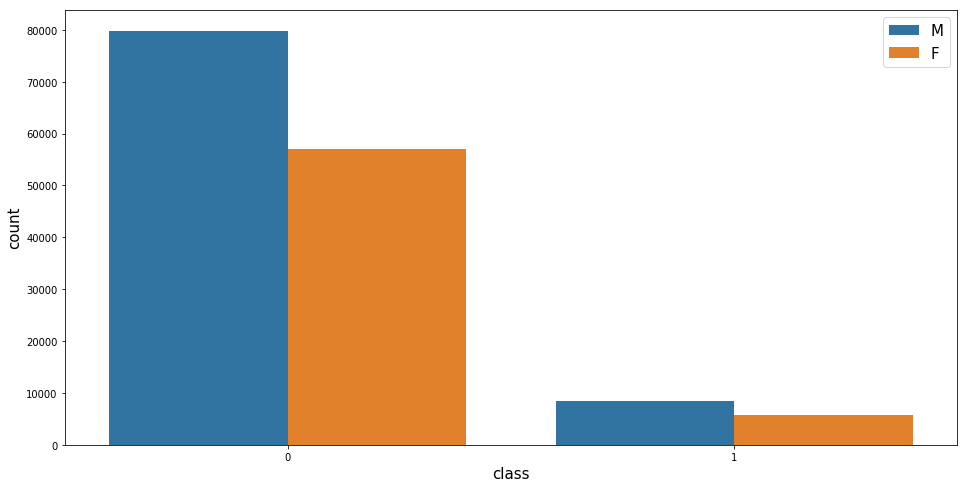

In [143]:
barplot(fraud_data, 'class', 'sex', yscale='linear')

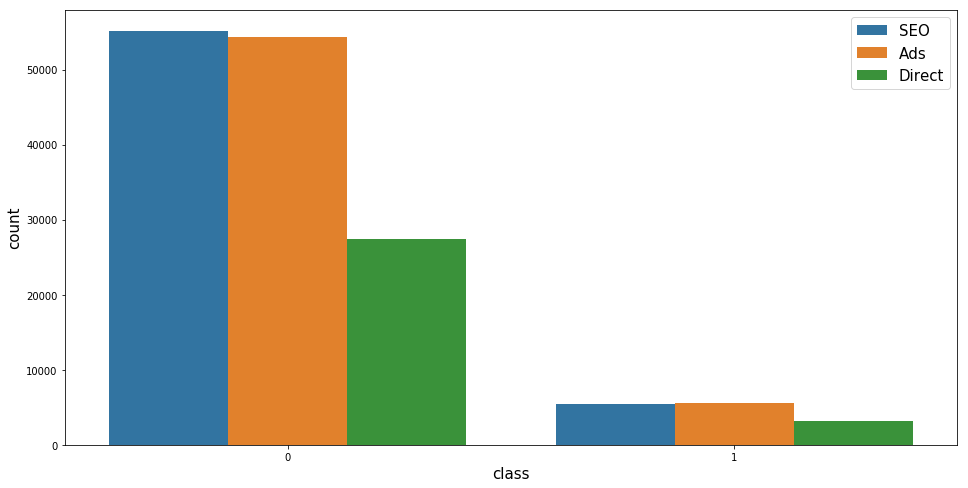

In [144]:
barplot(fraud_data,  'class', 'source', yscale='linear')

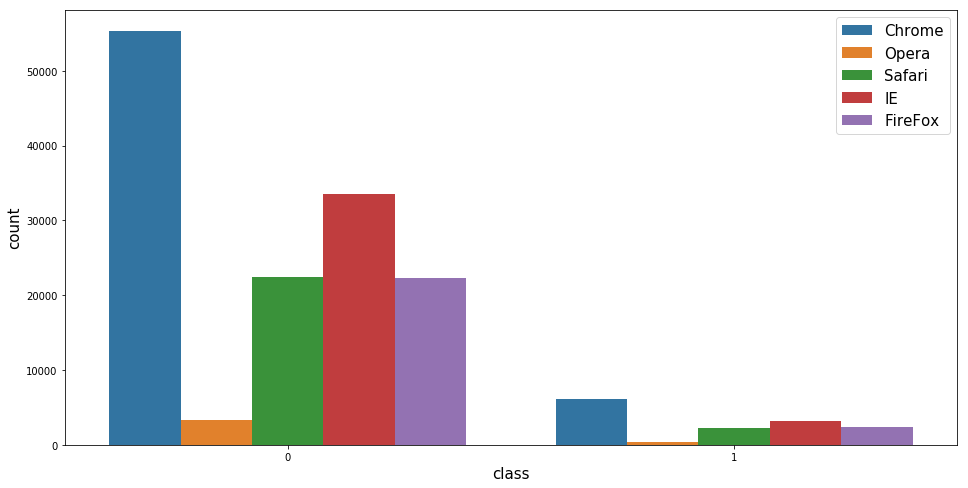

In [145]:
barplot(fraud_data,  'class', 'browser', yscale='linear')

In [163]:
user_id_count = fraud_data[['device_id', 'ip_address', 'user_id']].groupby('user_id').count().reset_index()

In [165]:
user_id_count['device_id'].value_counts()

1    151112
Name: device_id, dtype: int64

In [166]:
user_id_count['ip_address'].value_counts()

1    151112
Name: ip_address, dtype: int64

### Each user only has one unique device id and one unique ip address. Not some useful featues for the device_id count and ip_address count per user. 

### We can check the other way around, i.e. how many users share the same device id and ip address. 

In [170]:
user_id_count2 = fraud_data[['device_id', 'user_id']].groupby('device_id').count().reset_index()
user_id_count2['user_id'].value_counts().sort_index()

1     131781
2       5327
3         90
4          4
5         13
6         29
7         50
8         69
9         78
10        92
11       101
12        90
13        64
14        57
15        41
16        36
17        13
18        10
19         5
20         6
Name: user_id, dtype: int64

In [171]:
user_id_count3 = fraud_data[['ip_address', 'user_id']].groupby('ip_address').count().reset_index()
user_id_count3['user_id'].value_counts().sort_index()

1     142752
2          1
3          2
4          4
5         13
6         30
7         50
8         71
9         82
10        89
11       100
12        91
13        64
14        59
15        36
16        36
17        12
18         9
19         7
20         4
Name: user_id, dtype: int64

In [176]:
user_id_count2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137956 entries, 0 to 137955
Data columns (total 2 columns):
device_id    137956 non-null object
user_id      137956 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.1+ MB


In [177]:
user_id_count3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143512 entries, 0 to 143511
Data columns (total 2 columns):
ip_address    143512 non-null float64
user_id       143512 non-null int64
dtypes: float64(1), int64(1)
memory usage: 2.2 MB


In [178]:
user_id_count2.columns = ['device_id', 'users_sharing_device']
user_id_count3.columns = ['ip_address', 'users_sharing_ip']

In [180]:
fraud_data = pd.merge(fraud_data, user_id_count2, on='device_id', how='left')
fraud_data = pd.merge(fraud_data, user_id_count3, on='ip_address', how='left')

In [181]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_first_purchase,users_sharing_device,users_sharing_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


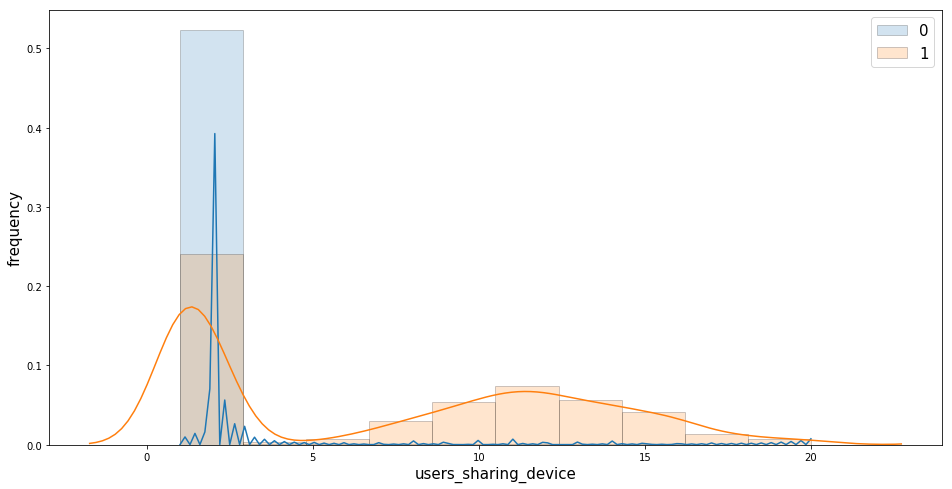

In [189]:
histplot(fraud_data, 'users_sharing_device', 'class', binsize=10, yscale='linear')

C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Mengfan\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


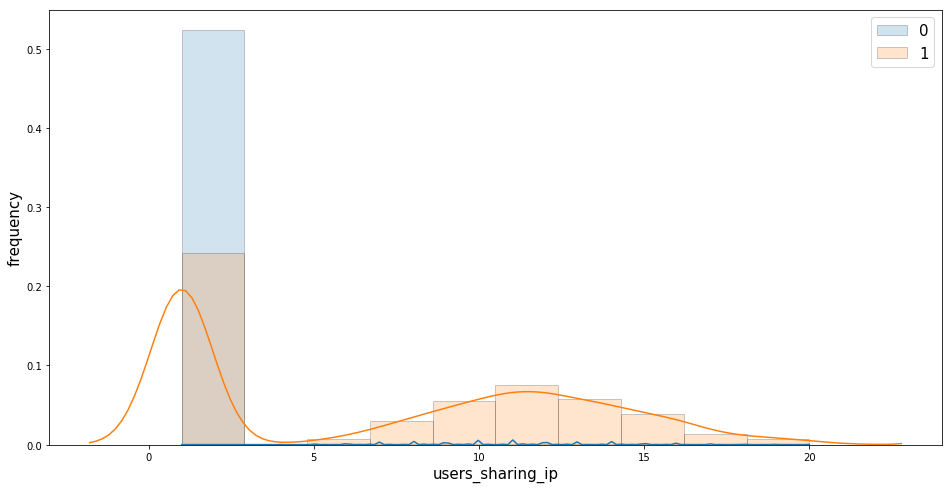

In [188]:
histplot(fraud_data, 'users_sharing_ip', 'class', binsize=10, yscale='linear')

### There are definitely more fraud sharing IP address and device ID.

## Create datetime features 

In [190]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,time_first_purchase,users_sharing_device,users_sharing_ip
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,13882,1,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944,1,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1,12,12
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Other,60085,1,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,41461,1,1


In [204]:
#pd.to_datetime(fraud_data['signup_time']).dt.to_period('D')

fraud_data['signup_month'] = pd.DatetimeIndex(fraud_data['signup_time']).month
fraud_data['signup_day'] = pd.DatetimeIndex(fraud_data['signup_time']).day
fraud_data['signup_hour'] = pd.DatetimeIndex(fraud_data['signup_time']).hour
fraud_data['signup_weekday'] = pd.DatetimeIndex(fraud_data['signup_time']).dayofweek

fraud_data['purchase_month'] = pd.DatetimeIndex(fraud_data['purchase_time']).month
fraud_data['purchase_day'] = pd.DatetimeIndex(fraud_data['purchase_time']).day
fraud_data['purchase_hour'] = pd.DatetimeIndex(fraud_data['purchase_time']).hour
fraud_data['purchase_weekday'] = pd.DatetimeIndex(fraud_data['purchase_time']).dayofweek

In [205]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,users_sharing_device,users_sharing_ip,signup_month,signup_day,signup_hour,signup_weekday,purchase_month,purchase_day,purchase_hour,purchase_weekday
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,1,1,2,24,22,1,4,18,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,1,6,7,20,6,6,8,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,12,12,1,1,18,3,1,1,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,...,1,1,4,28,21,1,5,4,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,1,7,21,7,1,9,9,18,2


In [206]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time_first_purchase', 'users_sharing_device',
       'users_sharing_ip', 'signup_month', 'signup_day', 'signup_hour',
       'signup_weekday', 'purchase_month', 'purchase_day', 'purchase_hour',
       'purchase_weekday'],
      dtype='object')

## Encode categorial features

In [208]:
# Categorical variable encoder

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
le = LabelEncoder()

cols = ['source', 'browser', 'sex', 'country']
for col in cols:
    le.fit(fraud_data[col])
    fraud_data['{}_code'.format(col)] = le.transform(fraud_data[col])


In [210]:
fraud_data.columns

Index(['user_id', 'signup_time', 'purchase_time', 'purchase_value',
       'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class',
       'country', 'time_first_purchase', 'users_sharing_device',
       'users_sharing_ip', 'signup_month', 'signup_day', 'signup_hour',
       'signup_weekday', 'purchase_month', 'purchase_day', 'purchase_hour',
       'purchase_weekday', 'source_code', 'browser_code', 'sex_code',
       'country_code'],
      dtype='object')

In [211]:
features = ['purchase_value', 'age', 'time_first_purchase', 'users_sharing_device',
       'users_sharing_ip', 'signup_month', 'signup_day', 'signup_hour',
       'signup_weekday', 'purchase_month', 'purchase_day', 'purchase_hour',
       'purchase_weekday', 'source_code', 'browser_code', 'sex_code',
       'country_code']
target = 'class'
X = fraud_data[features]
y = fraud_data[target]

In [212]:
X.head()

,purchase_value,age,time_first_purchase,users_sharing_device,users_sharing_ip,signup_month,signup_day,signup_hour,signup_weekday,purchase_month,purchase_day,purchase_hour,purchase_weekday,source_code,browser_code,sex_code,country_code
0,34,39,13882,1,1,2,24,22,1,4,18,2,5,2,0,1,84
1,16,53,17944,1,1,6,7,20,6,6,8,1,0,0,0,0,172
2,15,53,1,12,12,1,1,18,3,1,1,18,3,2,3,1,172
3,44,41,60085,1,1,4,28,21,1,5,4,13,0,2,4,1,126
4,39,45,41461,1,1,7,21,7,1,9,9,18,2,0,4,1,172


In [213]:
# Do a stratified 80-20 train-test split

from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y, test_size=0.2, random_state=0, shuffle=True, stratify=y )
print(len(y_train), len(y_holdout))
print(y_holdout.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))

120889 30223
0    0.906363
1    0.093637
Name: class, dtype: float64
0    0.906352
1    0.093648
Name: class, dtype: float64


## Decision Tree

In [229]:
# Test using a simple decision tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
#dtree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1)
dtree = DecisionTreeClassifier(random_state=1, max_depth=2, min_samples_leaf=10, max_leaf_nodes=20, min_samples_split=10)
#dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_prob_train = dtree.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, pd.DataFrame(pred_prob_train)[1])
print('ROC_AUC for train set is {}'.format(roc_auc_train))

pred_prob_holdout = dtree.predict_proba(X_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, pd.DataFrame(pred_prob_holdout)[1])
print('ROC_AUC for test set is {}'.format(roc_auc_holdout))

ROC_AUC for train set is 0.8466727640348408
ROC_AUC for test set is 0.8405287053939006


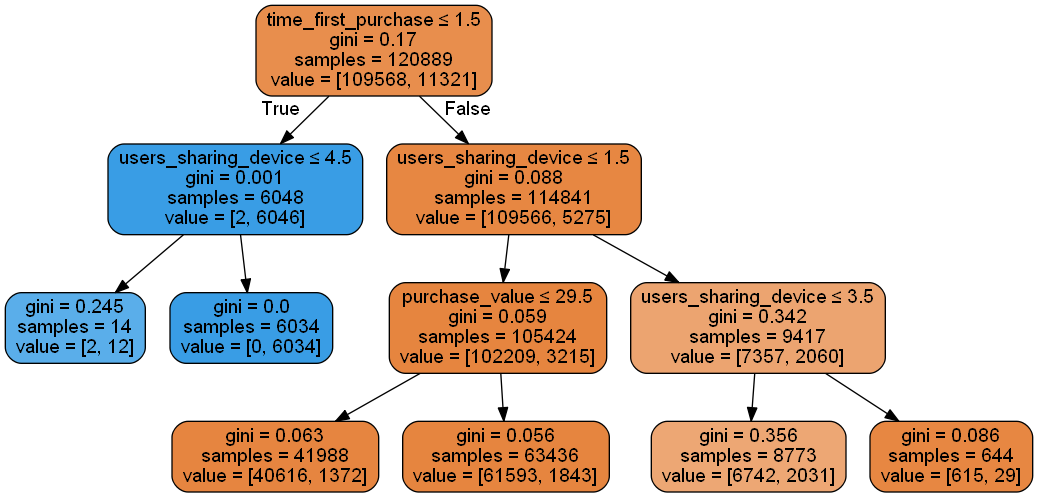

In [230]:
# Plot the tree structure
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
               feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

                 feature  importance
8         signup_weekday    0.000000
14          browser_code    0.000000
13           source_code    0.000000
12      purchase_weekday    0.000000
11         purchase_hour    0.000000
10          purchase_day    0.000000
9         purchase_month    0.000000
15              sex_code    0.000000
16          country_code    0.000000
6             signup_day    0.000000
5           signup_month    0.000000
4       users_sharing_ip    0.000000
3                    age    0.000000
7            signup_hour    0.000000
2         purchase_value    0.000060
1   users_sharing_device    0.058972
0    time_first_purchase    0.940969


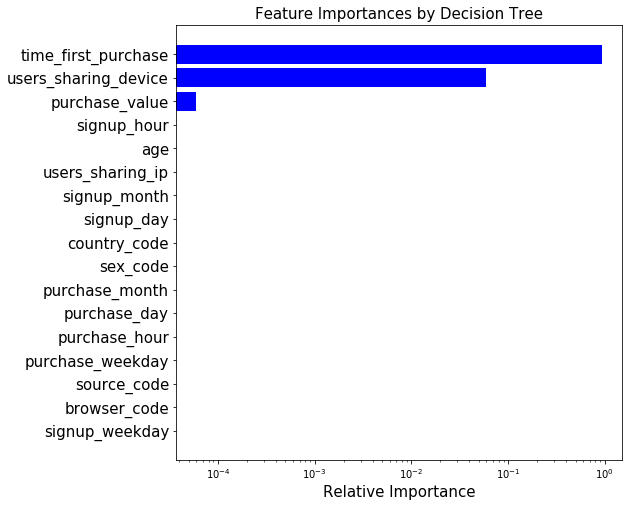

In [231]:
# Feature importance
features = list(X.columns)
importance = sorted(zip(features, dtree.feature_importances_), key=lambda x:x[1], reverse=True)
importances = pd.DataFrame(importance, columns=['feature', 'importance']).sort_values('importance', ascending=True)

print(importances)
    
fig = plt.figure(figsize=(8, 8))
plt.title('Feature Importances by Decision Tree', fontsize=15)
plt.barh(range(len(importances)), importances['importance'], color='b', align='center')
plt.yticks(range(len(importances)), importances['feature'], fontsize=15)
plt.xscale('log')
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

## Random Forest

In [235]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

#rf = RandomForestClassifier(random_state=0, max_depth=2, n_estimators=50, min_samples_leaf=10, max_leaf_nodes=20, min_samples_split=10)
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

pred_prob_train = rf.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, pd.DataFrame(pred_prob_train)[1])
print('ROC_AUC for train set is {}'.format(roc_auc_train))

pred_prob_holdout = rf.predict_proba(X_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, pd.DataFrame(pred_prob_holdout)[1])
print('ROC_AUC for test set is {}'.format(roc_auc_holdout))

ROC_AUC for train set is 0.9998711286607749
ROC_AUC for test set is 0.8301636215385556


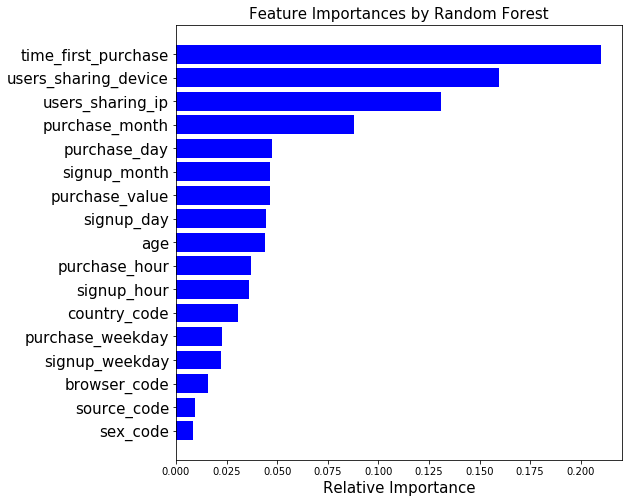

In [236]:
# Plot feature importance indicated by the Random Forest model

features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

fig = plt.figure(figsize=(8, 8))
plt.title('Feature Importances by Random Forest', fontsize=15)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=15)
plt.xlabel('Relative Importance', fontsize=15)
plt.show()

## XGBoost

In [239]:
# XGBoost

from xgboost import XGBClassifier
from xgboost import plot_importance

#xgb = XGBClassifier(random_state=2, max_depth=2, n_estimators=10, min_samples_leaf=10, max_leaf_nodes=20, min_samples_split=10)
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred_prob_train = xgb.predict_proba(X_train)
roc_auc_train = roc_auc_score(y_train, pd.DataFrame(pred_prob_train)[1])
print('ROC_AUC for train set is {}'.format(roc_auc_train))

pred_prob_holdout = xgb.predict_proba(X_holdout)
roc_auc_holdout = roc_auc_score(y_holdout, pd.DataFrame(pred_prob_holdout)[1])
print('ROC_AUC for test set is {}'.format(roc_auc_holdout))



ROC_AUC for train set is 0.8653245255623749
ROC_AUC for test set is 0.8462032096874457


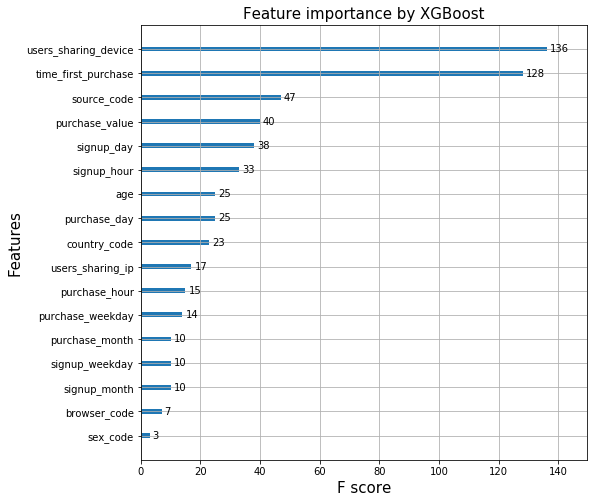

In [240]:
# Plot feature importance indicated by the XGBoost model

fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(xgb, ax=ax)
ax.set_xlabel('F score', fontsize=15)
ax.set_ylabel('Features', fontsize=15)
ax.set_title('Feature importance by XGBoost', fontsize=15)
plt.show()

### Number of users sharing device/IP and time between signup and first purchase are definitely the two most important features predicting fraud, as suggested by all three models. 

### XGBoost has the best performance without overfitting. Let's use this model for ROC_AUC analysis. 

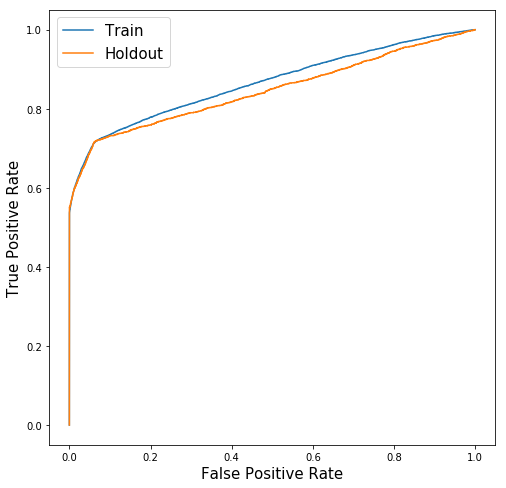

In [245]:
# Plot ROC_AUC curve 

fpr1,tpr1,thresholds1 = roc_curve(y_train, pd.DataFrame(pred_prob_train)[1])
#roc_auc = auc(fpr, tpr)

fpr2,tpr2,thresholds2 = roc_curve(y_holdout, pd.DataFrame(pred_prob_holdout)[1])
#roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8,8))
plt.plot(fpr1,tpr1,label='Train')
plt.plot(fpr2,tpr2,label='Holdout')
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [246]:
fpr1,tpr1,thresholds1

(array([0.        , 0.        , 0.        , ..., 0.9998631 , 0.99988135,
        1.        ]),
 array([7.06651356e-04, 1.50163413e-03, 2.03162265e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.99979526, 0.9997892 , 0.9997875 , ..., 0.01872548, 0.01869987,
        0.01645031], dtype=float32))

### Cut-off threshold decreases from the lower left to upper right on the curve. 
### If the cost of False Positive > cost of False Negative, for instance, predicting a fraud that's actually legitimate, we lose more business, we need to avoid over-predicting False Positive, then we can select a big cut-off value that keeps FPR close to 0.
### If the cost of False Negative > cost of False Positive, for instance, predicting legitimate for an actual fraud has bad effect, we want to choose a smaller cut-off value to maximize TPR. 

### We can predict probability of fraud. If there's a low probability, we don't want to take any action on the user. 

### If the predicted probability of fraud is between a certain range. We can take a second verification step, such as verify text message. 

### If the predicted probability of fraud is very high, we can suspend the user account. 